# Contact Angle

The contact angle of a liquid in contact with a solid is the result of cohesive and adhesive molecular forces. The contact angle is often used to characterize the wettability of a surface (e.g. leaf surface, soil surface, glass surface, asphalt, etc.). Contact angles larger than 90 usually mean that the substrate is hydrophobic (forces of cohesion predominate over adhesion), while contact angle lower than 90 degrees mean that the substrate is hydrophilic (adhesive forces predominate over cohesion). For instance a drop of pure water on a clean glass surface may reach a contact angle of nearly 0 degrees. This means that the drop will completely spread on the surface.

Measuring the contact angle may seem difficult since we usually deal with small droplets. Side-view digital images is a rather simple technique that can provide with exceptional accuracy. The instrument that measures the contact angle of drops is called a goniometer. For this exercise I will use a side-view image taken with an inexpensive usb microscope using a drop water where I previously added some food dye to enhance the contrast with the background.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread


In [3]:
# Read image of drop
img_drop = imread('../datasets/sessile_drop.jpg')


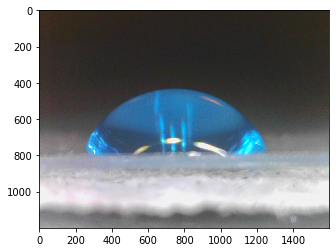

In [4]:
# Plot image
plt.imshow(img_drop)
plt.show()

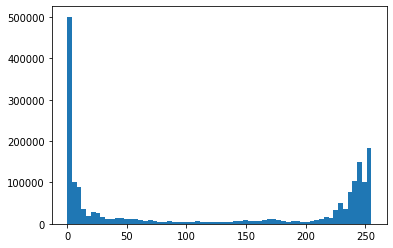

In [6]:
red = img_drop[:,:,0]
green = img_drop[:,:,1]
blue = img_drop[:,:,2]

ExB = 2*blue - red - green
plt.hist(ExB.flatten(), bins=64)
plt.show()

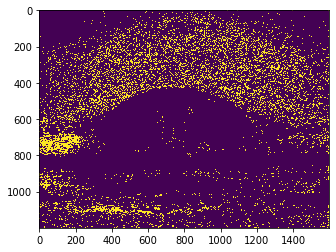

In [13]:
idx_drop = ExB > 250 #np.logical_and(img_drop[:,:,0] < 80, img_drop[:,:,2] > 100)
plt.imshow(idx_drop)
plt.show()

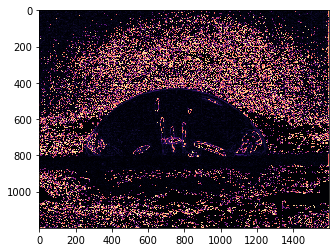

In [7]:
from skimage import filters
edges = filters.sobel(ExB)
plt.imshow(edges, cmap='magma')
plt.show()

In [23]:
min_rows = np.argmax(idx_drop, axis=0)
min_rows.shape

(1600,)

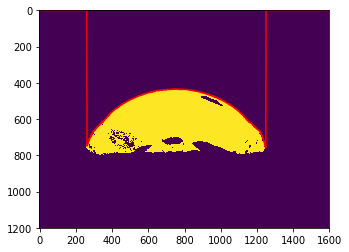

In [24]:
plt.imshow(idx_drop)
plt.plot(np.arange(1600),min_rows, c='r')
plt.show()

In [16]:
from skimage.feature import canny
edges = canny(idx_drop, sigma=3, low_threshold=10, high_threshold=50)


In [18]:
from skimage.measure import find_contours, approximate_polygon

contours = find_contours(idx_drop, 0.9)

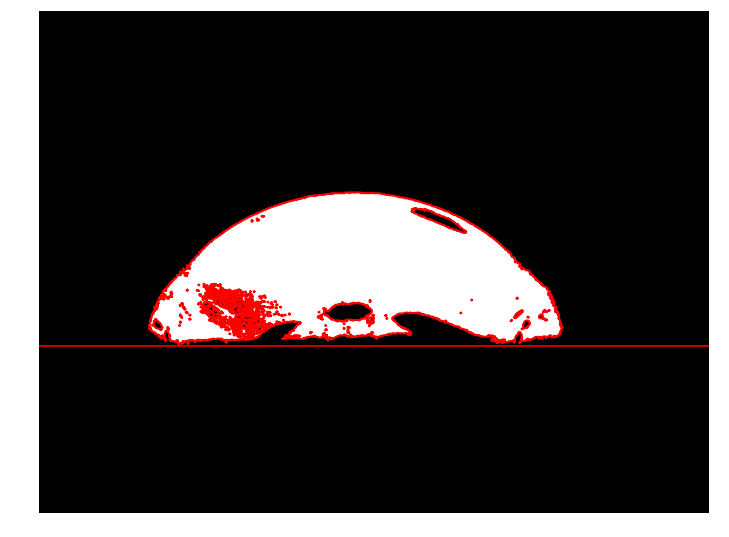

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(idx_drop, cmap='gray')
plt.axis('off')
plt.axhline(800, color='r')
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], '-r', linewidth=2)

In [59]:
from skimage.measure import find_contours, label, regionprops

# label image regions
label_image = label(idx_drop)
